In [2]:
#말뭉치(corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합
#영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로)
s = 'Hello World'
print(s.lower())

hello world


In [3]:
#특수문자 제거
#숫자는 꼭 필요한 경우만 남길 것
import re

#숫자 제거
p = re.compile('[0-9]+')
result = p.sub('', '올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다.')
print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다.


In [4]:
#특수문자 제거

import re

def clean_test(input_data):
    p = re.compile('[0-9_!@#$%^&*]')
    result = p.sub('', input_data)
    return result

txt = '올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다. @!#5$@^'
print(txt)
print(clean_test(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다. @!#5$@^
올해 들어 서울 지역의 부동산 가격이  하락했습니다. 


In [5]:
#불용어 처리
# 번번하게 사용되나 구체적인 의미가 없는 단어들(가령 영어의 관사 a, an, the)

words=['추석', '연휴', '민족', '대이동', '시작', '늘어', '교통량', '교통사고', '특히',
'자동차', '고장', '상당수', '나타', '것', '기자']

stopwords=['가다', '늘어', '나타', '것', '기자']

[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [6]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

words=["chief","justice","roberts",",","president","carter",
",","president","clinton","president","bush","obama","fellow",
"americans","and","people","of","the","world","thank","you"]

print([w for w in words if not w in stopwords.words('english')])

['chief', 'justice', 'roberts', ',', 'president', 'carter', ',', 'president', 'clinton', 'president', 'bush', 'obama', 'fellow', 'americans', 'people', 'world', 'thank']


In [8]:
#어근 동일화 처리: 비슷한 어근 처리(stemming)
import nltk
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stm = PorterStemmer()
txt='cook cooker cooking cooks cookery'
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

cook cooker cook cook cookeri 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
stm = PorterStemmer()
#어근이 동일한 키워드 정리
txt = 'pythoning pythons Python pythoners pythoned'
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

python python python python python 

In [10]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능
from nltk.stem.lancaster import LancasterStemmer
stm = LancasterStemmer()
txt = 'cook cooker cooking cooks cookery'
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

cook cook cook cook cookery 

In [11]:
stm = LancasterStemmer()
txt = 'pythoning pythons Python pythoners pythoned'
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

python python python python python 

In [12]:
#Porter나 Lancaster가 처리하지 못하는 경우
#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함
from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')
print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))

cook
cookery
leside


In [13]:
stm = RegexpStemmer('python')
txt = 'pythoning pythons Python pythoners pythoned'
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

ing s Python ers ed 

In [14]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄
# 보편적으로 영어에 적용됨

txt = 'Hello'
for i in range(len(txt) - 1):
    #현재 문자와 그다음 문자 출력
    print(txt[i], txt[i + 1], sep='')

He
el
ll
lo


In [15]:
txt = 'this is python script'
# 공백을 기준으로 문자열을 분리하여 리스트로 저장
words = txt.split()
# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
for i in range(len(words) - 1):
    # 현재 문자열과 그다음 문자열 출력
    print(words[i], words[i + 1])

this is
is python
python script


In [16]:
txt = 'hello'

two_gram = zip(txt, txt[1:])
for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [17]:
txt = 'this is python script'
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [18]:
from nltk import ngrams

sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(), 2)
for gram in grams:
    print(gram, end=' ')

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [19]:
#한국어 처리
#헌법 말뭉치
from konlpy.corpus import kolaw

#말뭉치에 포함된 파일 목록
kolaw.fileids()

['constitution.txt']

In [20]:
# 헌법
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [21]:
# 국회의안 말뭉치
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [22]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [24]:
#품사 분석
# POS 태깅(part-of-speech)
# 한나눔 패키지

from konlpy.tag import Hannanum
han = Hannanum()
txt='''
'정의란 무엇인가' 저자 마이클 샌델 교수와 화상 대담
이재명 "취약계층 할당 재고하자는 청년들, 안타까워"
샌델 "성공에 운이 크게 작용…인식 못하면 오만에 빠져"
'''

#품사 분석 함수
han.morphs(txt)

["'",
 '정의',
 '란',
 '무엇',
 '이',
 'ㄴ가',
 "'",
 '저',
 '이',
 '자',
 '마이클',
 '샌델',
 '교수',
 '와',
 '화상',
 '대담',
 '이재명',
 '"',
 '취약계층',
 '할당',
 '재',
 '고',
 '하',
 '자는',
 '청년',
 '들',
 ',',
 '안타깝',
 '어',
 '"',
 '샌델',
 '"',
 '성공',
 '에',
 '운',
 '이',
 '크',
 '게',
 '작용…인식',
 '못하',
 '면',
 '오만',
 '에',
 '빠지',
 '어',
 '"']

In [25]:
print(han.nouns(txt))

['정의', '무엇', '저', '마이클', '샌델', '교수', '화상', '대담', '이재명', '취약계층', '할당', '청년', '샌델', '성공', '운', '작용…인식', '오만']


In [26]:
print(han.pos(txt))

[("'", 'S'), ('정의', 'N'), ('란', 'J'), ('무엇', 'N'), ('이', 'J'), ('ㄴ가', 'E'), ("'", 'S'), ('저', 'N'), ('이', 'J'), ('자', 'E'), ('마이클', 'N'), ('샌델', 'N'), ('교수', 'N'), ('와', 'J'), ('화상', 'N'), ('대담', 'N'), ('이재명', 'N'), ('"', 'S'), ('취약계층', 'N'), ('할당', 'N'), ('재', 'P'), ('고', 'E'), ('하', 'P'), ('자는', 'E'), ('청년', 'N'), ('들', 'X'), (',', 'S'), ('안타깝', 'P'), ('어', 'E'), ('"', 'S'), ('샌델', 'N'), ('"', 'S'), ('성공', 'N'), ('에', 'J'), ('운', 'N'), ('이', 'J'), ('크', 'P'), ('게', 'E'), ('작용…인식', 'N'), ('못하', 'P'), ('면', 'E'), ('오만', 'N'), ('에', 'J'), ('빠지', 'P'), ('어', 'E'), ('"', 'S')]


In [27]:
print(han.tagset)

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [28]:
#꼬꼬마 패키지
from konlpy.tag import Kkma
kkm = Kkma()
print(kkm.morphs(txt)) # 형태소 분석

["'", '정의', '이', '란', '무엇', '이', 'ㄴ가', "'", '저자', '마이클', '새', 'ㄴ', '델', 'ㄹ', '교수', '와', '화상', '대담', '이재명', '"', '취약', '계층', '할당', '재고', '하자', '는', '청년', '들', ',', '안타깝', '어', '"', '새', 'ㄴ', '델', 'ㄹ', '"', '성공', '에', '운', '이', '크', '게', '작용', '…', '인식', '못하', '면', '오만', '에', '빠지', '어', '"']


In [29]:
print(kkm.nouns(txt))

['정의', '무엇', '저자', '마이클', '교수', '화상', '대담', '이재명', '취약', '취약계층', '계층', '할당', '재고', '재고하자', '하자', '청년', '성공', '운', '작용', '인식', '오만']


In [30]:
print(kkm.pos(txt))

[("'", 'SS'), ('정의', 'NNG'), ('이', 'VCP'), ('란', 'ETD'), ('무엇', 'NNG'), ('이', 'VCP'), ('ㄴ가', 'ECS'), ("'", 'SS'), ('저자', 'NNG'), ('마이클', 'NNG'), ('새', 'VV'), ('ㄴ', 'ETD'), ('델', 'VV'), ('ㄹ', 'ETD'), ('교수', 'NNG'), ('와', 'JC'), ('화상', 'NNG'), ('대담', 'NNG'), ('이재명', 'NNG'), ('"', 'SS'), ('취약', 'NNG'), ('계층', 'NNG'), ('할당', 'NNG'), ('재고', 'NNG'), ('하자', 'NNG'), ('는', 'JX'), ('청년', 'NNG'), ('들', 'XSN'), (',', 'SP'), ('안타깝', 'VA'), ('어', 'ECS'), ('"', 'SS'), ('새', 'VA'), ('ㄴ', 'ETD'), ('델', 'VV'), ('ㄹ', 'ETD'), ('"', 'SS'), ('성공', 'NNG'), ('에', 'JKM'), ('운', 'NNG'), ('이', 'JKS'), ('크', 'VA'), ('게', 'ECD'), ('작용', 'NNG'), ('…', 'SE'), ('인식', 'NNG'), ('못하', 'VX'), ('면', 'ECE'), ('오만', 'NNG'), ('에', 'JKM'), ('빠지', 'VV'), ('어', 'ECS'), ('"', 'SS')]


In [31]:
print(kkm.tagset)

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [32]:
#트위터 패키지
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(txt))

['\n', "'", '정의', '란', '무엇', '인가', "'", '저자', '마이클', '샌델', '교수', '와', '화상', '대담', '\n', '이재명', '"', '취약', '계층', '할당', '재고', '하자는', '청년', '들', ',', '안타까워', '"', '\n', '샌델', '"', '성공', '에', '운', '이', '크게', '작용', '…', '인식', '못', '하면', '오만', '에', '빠져', '"', '\n']


In [33]:
print(okt.nouns(txt))

['정의', '란', '무엇', '저자', '마이클', '샌델', '교수', '화상', '대담', '이재명', '취약', '계층', '할당', '재고', '청년', '샌델', '성공', '운', '크게', '작용', '인식', '오만']


In [34]:
print(okt.pos(txt))

[('\n', 'Foreign'), ("'", 'Punctuation'), ('정의', 'Noun'), ('란', 'Noun'), ('무엇', 'Noun'), ('인가', 'Josa'), ("'", 'Punctuation'), ('저자', 'Noun'), ('마이클', 'Noun'), ('샌델', 'Noun'), ('교수', 'Noun'), ('와', 'Josa'), ('화상', 'Noun'), ('대담', 'Noun'), ('\n', 'Foreign'), ('이재명', 'Noun'), ('"', 'Punctuation'), ('취약', 'Noun'), ('계층', 'Noun'), ('할당', 'Noun'), ('재고', 'Noun'), ('하자는', 'Verb'), ('청년', 'Noun'), ('들', 'Suffix'), (',', 'Punctuation'), ('안타까워', 'Adjective'), ('"', 'Punctuation'), ('\n', 'Foreign'), ('샌델', 'Noun'), ('"', 'Punctuation'), ('성공', 'Noun'), ('에', 'Josa'), ('운', 'Noun'), ('이', 'Josa'), ('크게', 'Noun'), ('작용', 'Noun'), ('…', 'Punctuation'), ('인식', 'Noun'), ('못', 'VerbPrefix'), ('하면', 'Verb'), ('오만', 'Noun'), ('에', 'Josa'), ('빠져', 'Verb'), ('"', 'Punctuation'), ('\n', 'Foreign')]


In [35]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [36]:
#어구 추출
print(okt.phrases(txt))

['정의란', '정의란 무엇', '저자', '저자 마이클', '저자 마이클 샌델', '저자 마이클 샌델 교수', '저자 마이클 샌델 교수와 화상', '저자 마이클 샌델 교수와 화상 대담', '이재명', '취약계층', '취약계층 할당', '취약계층 할당 재고', '취약계층 할당 재고하자는 청년들', '샌델', '성공', '크게', '크게 작용', '인식', '인식 못', '인식 못하면 오만', '정의', '무엇', '마이클', '교수', '화상', '대담', '취약', '계층', '할당', '재고', '청년들', '작용', '오만']


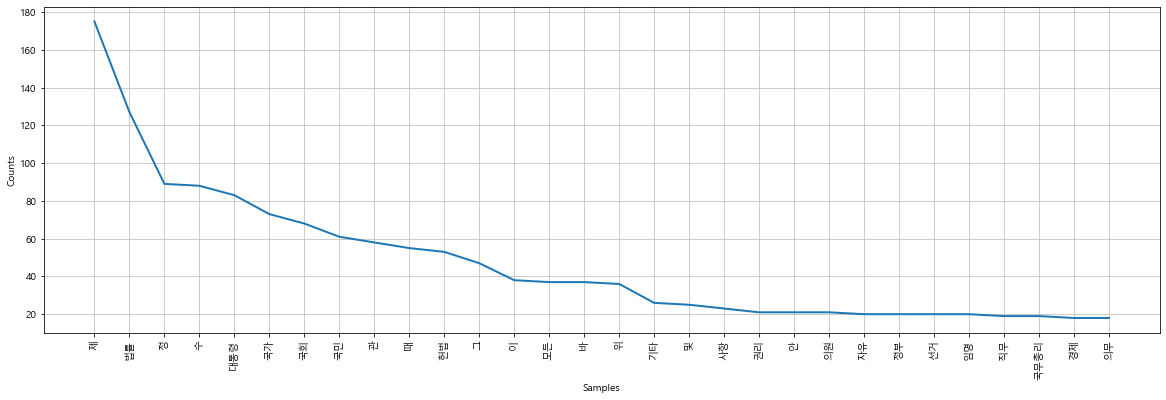

<function matplotlib.pyplot.show(close=None, block=None)>

In [38]:
#단어 출현 빈도
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

from nltk import Text
plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)
plt.show

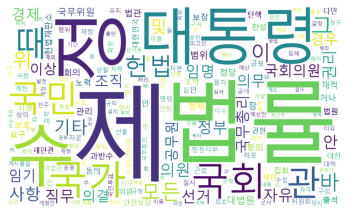

In [39]:
from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'

wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

In [40]:
#영어 품사 분석
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
a = 'I love you.'
tags = pos_tag(a.split())
print(tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


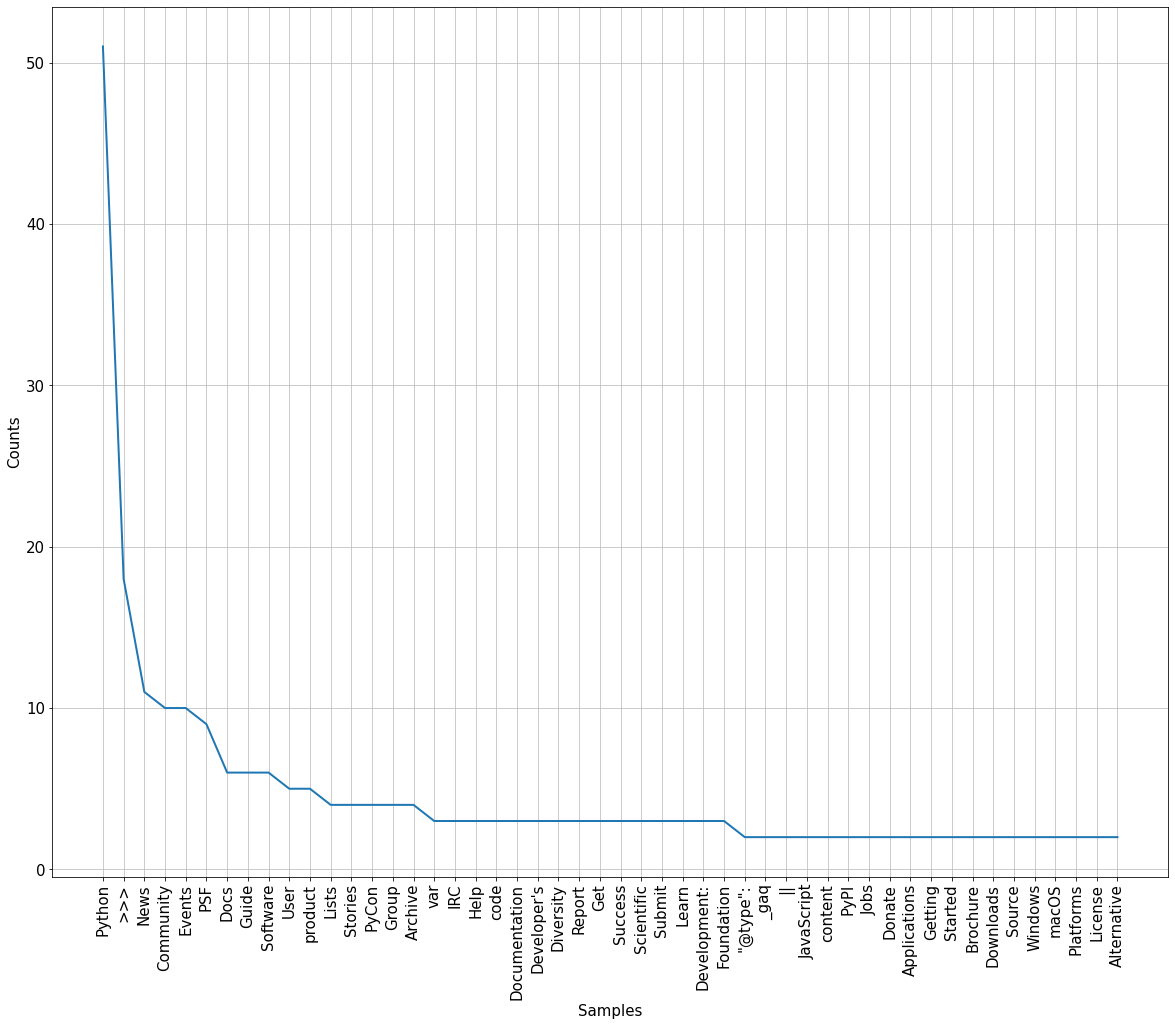

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [1]:
%matplotlib inline

import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,16)
plt.rcParams['font.size']=15

#url 접속
res = urllib.request.urlopen('http://python.org/')
html = res.read() #html 코드 읽기

#알파벳, 숫자, _, 문자들만 선택
tokens = re.split('\W+', html.decode('utf-8'))
clean = BeautifulSoup(html, 'html.parser').get_text()
tokens = [token for token in clean.split()] #단어 리스트

stop = set(stopwords.words('english'))

clean_tokens = [token for token in tokens
if len(token.lower()) > 1 and (token.lower() not in stop)]

tagged = nltk.pos_tag(clean_tokens)

#보통명사, 고유명사만 추출
allnoun = [word for word, pos in tagged if pos in ['NN', 'NNP']]

freq_result = nltk.FreqDist(allnoun)
freq_result.plot(50, cumulative=False)

In [2]:
#실습예제
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
# 제인 오스틴의 엠마 문서
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [5]:
#tokenizing 문자열을 토큰으로 나누어 분석하는 과정
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3]) #3번문장

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100]) #50~99 단어

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [7]:
#형태소: 일정한 의미가 있는 가장 작은 말의 단위
#형태소 분석: 언어적 속성에 따라 형태소를 찾아내고 처리하는 작업
#어간추출(stemming), 원형복원(lemmatizing), 품사부착(Part-of-speech tagging)

#stemming 접미사, 어미 등을 제거
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print([st1.stem(w) for w in words])
print([st2.stem(w) for w in words])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [8]:
#lemmatizing : 동의어를 사전형으로 통일
#품사를 지정하면 더 정확한 원형을 찾을 수 있음
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
words = ['fly', 'flies', 'flying', 'flew', 'flown']

#동사원형
[lm.lemmatize(w, pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [9]:
#품사의 정의&정리
nltk.help.upenn_tagset()
nltk.help.upenn_tagset('VB')

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

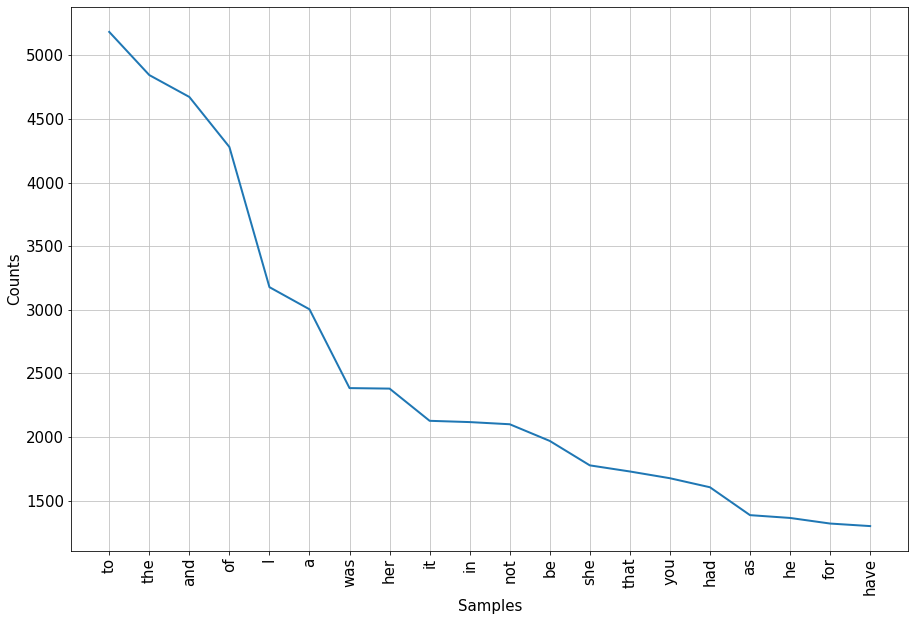

In [10]:
#각 단어의 사용 빈도를 그래프로 출력
%matplotlib inline
from nltk import Text
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer('[\w]+') #특수문자 제거

text = Text(retokenize.tokenize(emma_raw))
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=15

text.plot(20) #상위 20개 단어 출력
plt.show()

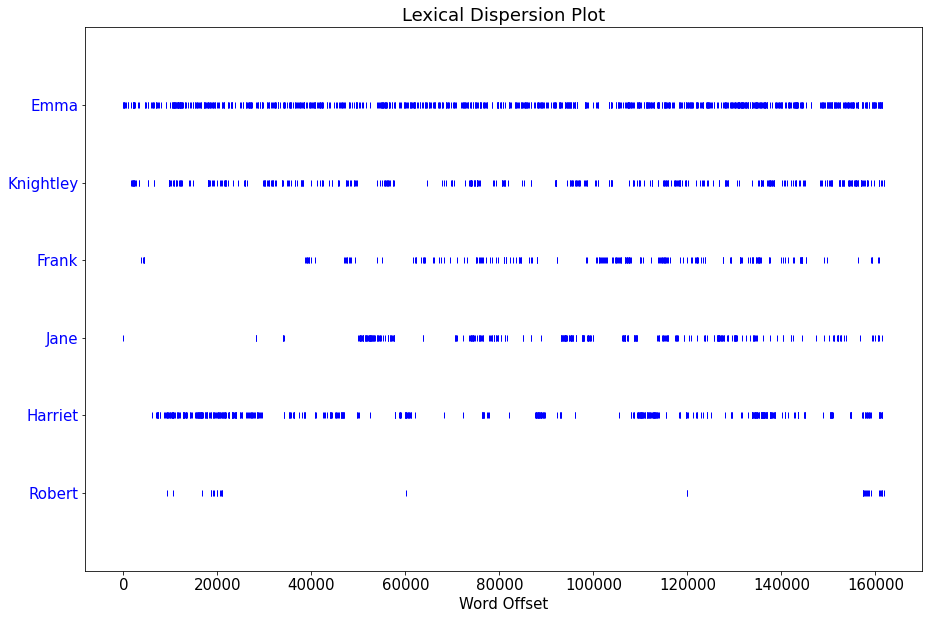

In [11]:
#단어가 사용된 위치를 시각화
#소설 엠마의 각 등장인물에 대해 적용
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])

In [12]:
#단어가 사용된 위치 표시
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [13]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [14]:
#두 단어가 공통적으로 들어갈 수 있는 문맥
text.common_contexts(['Emma', 'she'])
#밑줄 부분은 Emma와 she가 들어갈 경우 같은 의미가 됨

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [16]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear']
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [17]:
#전체 단어의 수, 'Emma'라는 단어의 출현 횟수, 확률
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(7863, 830, 0.10555767518758744)

In [18]:
#most_common 메서드 = 가장 출현 횟수가 높은 단어
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

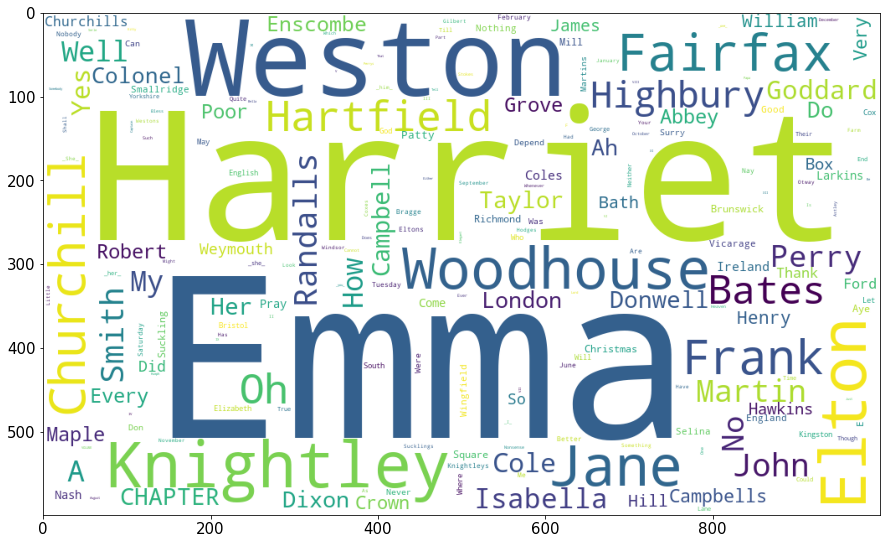

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()

In [21]:
# 단어 빈도 분석
# 트럼프 연설문
f = open('c:/data/text/trumph.txt', 'r')
lines = f.readlines()
f.close()
print(lines[0:100])

[" Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you. Today’s ceremony however, has very special meaning, because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC. And giving it back to you, the people. For too long, hav

In [22]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
words = lines[0].lower()
tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list(tokens) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]

In [23]:
import pandas as pd

#연설문에 인용된 단어들을 빈도순으로 내림차순 정렬
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
new          6
world        6
never        6
dtype: int64

Counter({'america': 20, 'american': 11, 'people': 10, 'country': 9, 'one': 8, 'every': 7, 'nation': 7, 'world': 6, 'great': 6, 'back': 6, 'never': 6, 'new': 6, 'president': 5, 'many': 5, 'today': 5, 'protected': 5, 'across': 5, 'right': 5, 'dreams': 5, 'god': 5, 'make': 5, 'americans': 4, 'thank': 4, 'citizens': 4, 'together': 4, 'power': 4, 'first': 4, 'wealth': 4, 'everyone': 4, 'day': 4, 'heart': 4, 'bring': 4, 'obama': 3, 'government': 3, 'jobs': 3, 'left': 3, 'factories': 3, 'families': 3, 'united': 3, 'whether': 3, 'millions': 3, 'foreign': 3, 'countries': 3, 'nations': 3, 'borders': 3, 'must': 3, 'bless': 3, 'national': 2, 'years': 2, 'face': 2, 'get': 2, 'done': 2, 'transferring': 2, 'another': 2, 'washington': 2, 'long': 2, 'share': 2, 'politicians': 2, 'victories': 2, 'triumphs': 2, 'capital': 2, 'land': 2, 'moment': 2, 'states': 2, 'truly': 2, 'forgotten': 2, 'men': 2, 'women': 2, 'longer': 2, 'movement': 2, 'exists': 2, 'children': 2, 'safe': 2, 'good': 2, 'righteous': 2, '

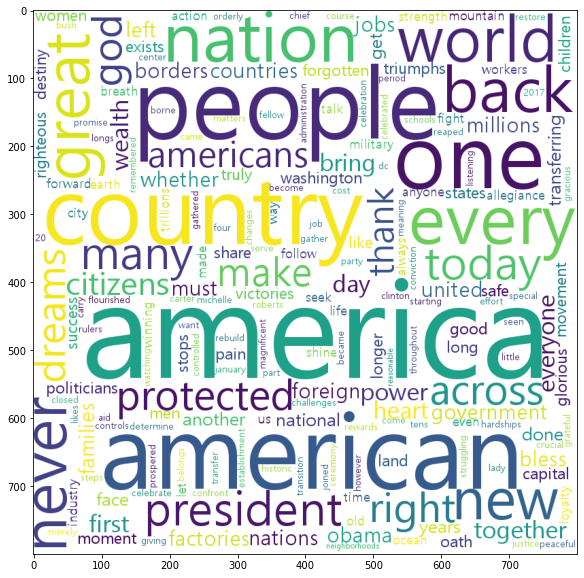

In [24]:
#워드 클라우드
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#트럼프 연설문을 워드 클라우드로 표현
wordcloud = WordCloud(
    font_path = 'c:/windows/fonts/malgun.ttf',
    width = 800,
    height= 800,
    background_color = 'white'
)

#단어별 출현횟수
count = Counter(stopped_tokens2)
print(count)
wordcloud = wordcloud.generate_from_frequencies(count)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()





In [26]:
#뉴스기사 실습
f = open('c:/data/text/news1.txt', 'r', encoding='utf-8')
lines = f.readlines()
f.close()

#한나눔 형태소 분석기
from konlpy.tag import Hannanum

han = Hannanum()

temp = []
for i in range(len(lines)):
    #명사만 추출
    a = lines[i].strip()
    temp.append(han.nouns(a))

# 2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList = []
    for elem in items:
        if type(elem) == list: #자료형이 리스트이면
            for e in elem:
                flatList.append(e) # flatList에 저장
        else:
            flatList.append(elem) #리스트가 아니라면
    return flatList #그대로 저장

word_list = flatten(temp)

#두글자 이상의 단어만 추출
word_list = pd.Series([x for x in word_list if len(x) > 1])



In [27]:
word_list.value_counts().head(10)

청와대      7
수석       7
사의       6
대통령      4
민정수석     3
수용       3
입사지원서    3
아들       3
논란       3
이날       3
dtype: int64

In [28]:
# 불용어 처리
stopwords=['전날', '오전']
word_list2 = [i for i in word_list if i not in stopwords]

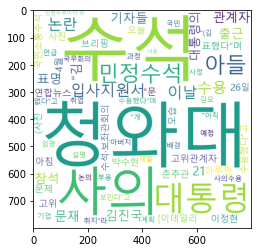

In [30]:
# 한글 뉴스를 워드클라우드로 출력
from collections import Counter
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='c:/windows/fonts/malgun.ttf', width=800,
height=800, background_color='white')
import matplotlib.pyplot as plt

count = Counter(word_list2)
wordcloud = wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()